<img src= https://www.digitalhouse.com/logo-DH.png width= '300' style="float: right;">


  
     

  
# Desafío 1 - Análisis exploratorio de un dataset de precios de propiedades
#    

## Importación de las librerias a usar 

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importación del archivo a utilizar

In [2]:
df = pd.read_csv('properatti.csv')

## Primera inspeccion de los datos

In [3]:
df.shape

(121220, 26)

In [4]:
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [6]:
df.describe().round(1)

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.0,102503.0,69670.0,69670.0,100810.0,100810.0,100810.0,81892.0,101313.0,68617.0,87658.0,7899.0,47390.0,14262.0
mean,60609.5,3574442.3,-34.6,-59.3,468525.9,4229396.8,239700.6,233.8,133.1,2160.1,6912.2,17.5,3.1,5009.2
std,34993.3,354130.6,2.0,2.3,2260100.6,6904714.1,391323.9,1782.2,724.4,2759.3,28378.6,120.2,1.9,120440.3
min,0.0,3427208.0,-54.8,-75.7,0.0,0.0,0.0,0.0,0.0,0.6,1.5,1.0,1.0,1.0
25%,30304.8,3430234.0,-34.7,-58.7,110000.0,1583309.4,89733.9,50.0,45.0,1218.2,1550.0,1.0,2.0,1000.0
50%,60609.5,3433910.0,-34.6,-58.5,185000.0,2558452.5,145000.0,84.0,75.0,1800.0,2213.1,3.0,3.0,2000.0
75%,90914.2,3836668.0,-34.4,-58.4,420000.0,4675792.5,265000.0,200.0,150.0,2486.4,3355.5,6.0,4.0,4000.0
max,121219.0,6948895.0,4.5,-53.7,650000000.0,821271104.3,46545445.0,200000.0,187000.0,206333.3,4000000.0,3150.0,32.0,10001500.0


#### Todos los registros con un 0 en las columnas precio, precio_local, precio_USD, superficie_total_m2 y ambientes deben ser incorrectos, entonces los reemplezamos con un NaN. Más adelante tratamos de complementar los NaN's con información de otra columnas.

In [7]:
df['price'].replace(0, np.nan,inplace=True)
df['price_aprox_local_currency'].replace(0, np.nan,inplace=True)
df['price_aprox_usd'].replace(0, np.nan,inplace=True)
df['surface_total_in_m2'].replace(0, np.nan,inplace=True)
df['surface_covered_in_m2'].replace(0, np.nan,inplace=True)

## Renombrar las columnas para evitar confusiones cuando trabajemos con los datos

In [8]:
new_names = {'operation': 'operacion', 'property_type':'tipo_propiedad', 'place_name': 'barrio', 
             'place_with_parent_names': 'lugar_con_padres', 'country_name':'pais', 'state_name': 'localidad', 
             'lat': 'latitud','lon': 'longitud', 'price':'precio', 'currency': 'moneda', 
             'price_aprox_local_currency':'precio_local', 'price_aprox_usd':'precio_USD', 
             'surface_total_in_m2':'superficie_total_m2', 'surface_covered_in_m2':'superficie_cubierta_m2',
             'price_usd_per_m2':'precio_USD_por_m2_total', 'price_per_m2':'precio_por_m2_cubierto', 'floor':'piso',
             'rooms':'ambientes', 'expenses': 'expensas', 'description': 'descripcion', 'title': 'titulo'}
              
# Analizando los valores de la columna precio por m2 (las dos) se detectó que cuando habla de "price_usd_per_m2" en 
# realidad es el valor del m2 teniendo el cuenta la superficie total (surface_total_in_m2) mientras que cuando habla de 
# "price_per_m2" se esta refiriendo a el valor del m2 teniedo en cuenta la superficie cubierta. Por lo tanto, decidimos 
# cambiar los nombres de estas columnas a 'precio_USD_por_m2_total' y 'precio_por_m2_cubierto'.

In [9]:
df.rename(columns=new_names,inplace=True)

## Identificación de datos faltantes

In [10]:
faltantes = df.isnull().sum()
faltantes_porc = round((faltantes/len(df)),3)*100

faltantes_df = pd.concat([faltantes, faltantes_porc], axis=1)
faltantes_df.columns = ['Cantidad de datos faltantes', 'Porcentaje de datos faltantes']
faltantes_df

,Cantidad de datos faltantes,Porcentaje de datos faltantes
Unnamed: 0,0,0.0
operacion,0,0.0
tipo_propiedad,0,0.0
barrio,23,0.0
lugar_con_padres,0,0.0
pais,0,0.0
localidad,0,0.0
geonames_id,18717,15.4
lat-lon,51550,42.5
latitud,51550,42.5


## Identificación de las columnas más importantes

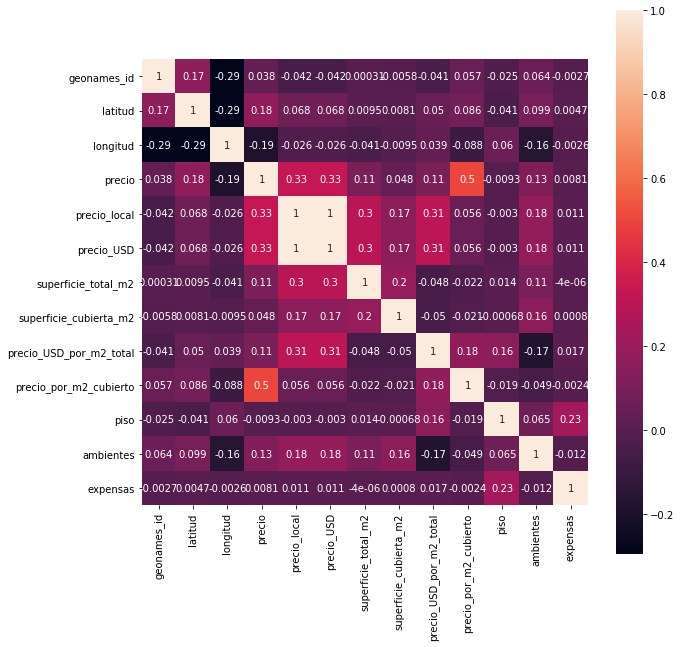

In [11]:
#Creo un dataframe temporal eliminando varias columnas (con datos cualitativas) para poder construir la matriz de correlaciones
df_matriz_corr = df.drop(['tipo_propiedad','barrio','lugar_con_padres','localidad','moneda','descripcion', 'titulo', 'Unnamed: 0', 'operacion','properati_url','image_thumbnail'],axis=1,inplace=False)
#Creo la matriz de correlaciones, cuanto mas cercano a 1 el valor mas correlacionadas están los campos que se ve claramente con la intensidad de los colores
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_matriz_corr.corr() , square=True, annot=True, ax=ax);

Las correlaciones más fuertes (donde los variables no son similares):
- precio local/usd y superficie total m2 (0,3)
- expensas y piso (0,23)
- longitud y precio (-0,19)
- latitud y precio (0,18)
- precio local/usd y ambientes (0,18)
- precio local/usd y superficie cubierta m2 (0,17)
- precio por m2 total y ambientes (-0,17)
- superficie cubierta y ambientes (0,16)
- longitud y ambientes (-0,16)
- piso y precio por m2 total (0,16)

## Eliminación de columnas en donde gran parte de sus valores son nulos o que no agregan valor para nuestro proyecto.

- Unnamed: 0
- Operación, era la misma para todos los casos
- País, todo corresponde a Argentina
- URL
- Imagen
- Expensas, pocos registros poblados
- Piso, abundan los nulos

In [12]:
df.drop(["Unnamed: 0", "operacion","properati_url","image_thumbnail","expensas","piso"],axis=1,inplace=True)

In [13]:
df.shape

(121220, 20)

## Registros duplicados

### Identificación de duplicados luego de eliminar la columnas redundantes

In [14]:
duplicateRowsDF = df[df.duplicated()]

In [15]:
duplicateRowsDF.shape

(5251, 20)

In [16]:
duplicateRowsDF

,tipo_propiedad,barrio,lugar_con_padres,pais,localidad,geonames_id,lat-lon,latitud,longitud,precio,moneda,precio_local,precio_USD,superficie_total_m2,superficie_cubierta_m2,precio_USD_por_m2_total,precio_por_m2_cubierto,ambientes,descripcion,titulo
221,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5652650561,-58.438232802",-34.565265,-58.438233,237895.0,USD,4197538.32,237895.00,69.0,53.0,3447.753623,4488.584906,2.0,El edificio está situado en el barrio de las ...,Ultimas Unidades
245,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
247,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
248,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
249,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
250,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
317,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,430000.0,USD,7587135.00,430000.00,125.0,156.0,3440.000000,2756.410256,NaN,Buena ubicaciÃ³n. Muy buen acceso. Lezica esq....,"Casa 125m² con 3 Plantas en Lezica, Martín 300..."
400,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,3429760.0,"-34.6179151,-58.3617661",-34.617915,-58.361766,350000.0,USD,6175575.00,350000.00,54.0,50.0,6481.481481,7000.000000,2.0,"En su dique 1, y delimitado por el Boulevard J...",ZenCity 2 Amb piso ALTO! Vista RIO
503,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,245000.0,USD,4322902.50,245000.00,160.0,135.0,1531.250000,1814.814815,NaN,Duplex de buenisimas medidas ( 5X33) Hall de a...,"Casa 160m² con 3 Plantas en Marconi, Ing. 2400..."
705,apartment,Santa Fe,|Argentina|Santa Fe|Santa Fe|,Argentina,Santa Fe,3836277.0,"-31.639488,-60.6853763",-31.639488,-60.685376,NaN,NaN,NaN,NaN,45.0,37.0,NaN,NaN,2.0,Venta de Departamento 1 DORMITORIO en COSTANER...,DEPARTAMENTO EN VENTA


### Eliminación de registros duplicados

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(115969, 20)

## Descomposición del campo "lugar_con_padres" para obtener mas datos relacionados a zona geografica

In [19]:
lugar=pd.DataFrame(df['lugar_con_padres'].str.split("|",n=6,expand = True))

In [20]:
new_names =  {1: 'Pais',
              2: 'Provincia',
              3: 'LocalBarrio',
              4: 'Barrio2',
              5: 'Barrio3',
              6: 'Barrio4',
             }

In [21]:
lugar.rename(columns=new_names,inplace = True)

In [22]:
lugar.sample(10)

,0,Pais,Provincia,LocalBarrio,Barrio2,Barrio3,Barrio4
60372,,Argentina,Santa Fe,Funes,,None,None
120358,,Argentina,Capital Federal,San Telmo,,None,None
83617,,Argentina,Córdoba,Córdoba,,None,None
45915,,Argentina,Capital Federal,Palermo,,None,None
36723,,Argentina,Capital Federal,Belgrano,,None,None
29465,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,,None,None
42619,,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,Villa Celina,,None
103359,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,,None,None
40473,,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,Villa Luzuriaga,,None
101710,,Argentina,Bs.As. G.B.A. Zona Sur,Lanús,Lanús,,None


## Completamos los barrios en donde estaba vacio

In [23]:
df['barrio']=df['barrio'].fillna(value=lugar.LocalBarrio)

In [24]:
df['barrio'].isnull().sum() # controlamos que el barrio esta completo en todos los casos

0

## Completar valores nulos y erroneos en las columnas de superficie

### En caso de que la superficie total sea menor a la superficie cubierta, invertimos los datos de estas columnas. Una inspección de los datos nos hace creer que los valores están invertidos por error.

In [25]:
df[(df['superficie_total_m2'] < df['superficie_cubierta_m2'])].shape

(1101, 20)

In [26]:
df[(df['superficie_total_m2'] < df['superficie_cubierta_m2'])].loc[:,['tipo_propiedad','barrio','superficie_total_m2','superficie_cubierta_m2']].head(10)

,tipo_propiedad,barrio,superficie_total_m2,superficie_cubierta_m2
78,house,Posadas,261.0,18615.0
177,apartment,Villa Carlos Paz,420.0,450.0
316,house,Capital Federal,125.0,156.0
455,house,Mar del Plata,170.0,430.0
668,house,Mar del Plata,180.0,230.0
918,apartment,Ramos Mejía,60.0,65.0
1397,apartment,Balvanera,80.0,89.0
1598,house,Rosario,90.0,105.0
1690,house,Ituzaingó,100.0,230.0
1696,house,Los Pingüinos Country Club,21.0,24.0


In [27]:
superficie_total_m2_copy = df['superficie_total_m2'].copy()
superficie_cubierta_m2_copy = df['superficie_cubierta_m2'].copy()

In [28]:
conditions = [(superficie_total_m2_copy < superficie_cubierta_m2_copy) , (superficie_total_m2_copy > superficie_cubierta_m2_copy)]

choices1 = [superficie_cubierta_m2_copy ,superficie_total_m2_copy]
choices2 = [superficie_total_m2_copy, superficie_cubierta_m2_copy]

df['superficie_total_m2'] = np.select(conditions, choices1, df['superficie_total_m2'])
df['superficie_cubierta_m2'] = np.select(conditions, choices2, df['superficie_cubierta_m2'])

In [29]:
# Controlamos que el cambio se ejecutó correctamente.
df.loc[[78,177,316,455,668,918,1397,1598,1690,1696],['tipo_propiedad','barrio','superficie_total_m2','superficie_cubierta_m2']]

,tipo_propiedad,barrio,superficie_total_m2,superficie_cubierta_m2
78,house,Posadas,18615.0,261.0
177,apartment,Villa Carlos Paz,450.0,420.0
316,house,Capital Federal,156.0,125.0
455,house,Mar del Plata,430.0,170.0
668,house,Mar del Plata,230.0,180.0
918,apartment,Ramos Mejía,65.0,60.0
1397,apartment,Balvanera,89.0,80.0
1598,house,Rosario,105.0,90.0
1690,house,Ituzaingó,230.0,100.0
1696,house,Los Pingüinos Country Club,24.0,21.0


### Completamos el campo 'superficie_total_m2' con el valor del campo 'superficie_cubierta_m2' en caso de que el primero sea nulo

In [30]:
df['superficie_total_m2']=df['superficie_total_m2'].fillna(value=df['superficie_cubierta_m2'])

In [31]:
df['superficie_total_m2'].isnull().sum()

12375

## Porque la columna 'precio_por_m2_cubierto' es una mezcla de precios en dolares y pesos, agregamos otra columna más con todos los precios por m2 cubierto en dolares. 

In [32]:
#df.loc[(df['superficie_cubierta_m2']==0),'superficie_cubierta_m2'] = np.nan
# Cambiamos todos los superficies de '0' a np.nan, para no obtener resultados infinitos por una division por 0.

In [33]:
df['precio_USD_por_m2_cubierto'] = df['precio_USD']/df['superficie_cubierta_m2']

In [34]:
df.columns

Index(['tipo_propiedad', 'barrio', 'lugar_con_padres', 'pais', 'localidad',
       'geonames_id', 'lat-lon', 'latitud', 'longitud', 'precio', 'moneda',
       'precio_local', 'precio_USD', 'superficie_total_m2',
       'superficie_cubierta_m2', 'precio_USD_por_m2_total',
       'precio_por_m2_cubierto', 'ambientes', 'descripcion', 'titulo',
       'precio_USD_por_m2_cubierto'],
      dtype='object')

## Completar valores nulos y erroneos en las columnas de precio por m2

In [35]:
# Cuando la superficie total es igual a la superficie cubierta, reemplazamos los valores nulos en precio_USD_por_m2_total
# por precio_USD_por_m2_cubierto y al revés.
# df.loc[(df['superficie_total_m2']==df['superficie_cubierta_m2']),'precio_USD_por_m2_total'].fillna(value=df['precio_USD_por_m2_cubierto'], inplace=True)
# df.loc[(df['superficie_total_m2']==df['superficie_cubierta_m2']),'precio_USD_por_m2_cubierto'].fillna(value=df['precio_USD_por_m2_total'], inplace=True)

El codigo arriba no ayudó a complementar valores nulos

In [36]:
precio_USD_por_m2_total_calc = df['precio_USD']/df['superficie_total_m2']
df['precio_USD_por_m2_total']=df['precio_USD_por_m2_total'].fillna(value=precio_USD_por_m2_total_calc)

precio_USD_por_m2_cubierto_calc = df['precio_USD']/df['superficie_cubierta_m2']
df['precio_USD_por_m2_cubierto']=df['precio_USD_por_m2_cubierto'].fillna(value=precio_USD_por_m2_cubierto_calc)

## Completamos la columna "ambientes" con información de la descripción y título. 
En el dataset original aprox. 60% de los valores de este campo son nulos.

### Preparación de las columnas 'descripcion' y 'titulo'

In [37]:
import unidecode

def quitar_caracteres(entrada):
    return str.lower(unidecode.unidecode(entrada))

In [38]:
df['descripcion'] = df['descripcion'].astype('str').apply(quitar_caracteres)
df['titulo'] = df['titulo'].astype('str').apply(quitar_caracteres)

### Se crea diccionario para modificar descripciones y titulos donde los ambientes esten indicados como string. Después se itera el campo descripcion y titulo reemplazando los valores del diccionario

In [39]:
numeros = {'mono': 1, 'uno':1 , 'un': 1, 'dos': 2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, 'siete': 7, 'ocho': 8, 'nueve': 9, 'diez':10}
for  key, value in numeros.items():
   df.loc[:, 'descripcion'] = df.loc[:, 'descripcion'].str.replace(key, str(value))

for  key, value in numeros.items():
   df.loc[:, 'titulo'] = df.loc[:, 'titulo'].str.replace(key, str(value))

### Se crea pattern y column Amb donde se aplica la regex

In [40]:
#pattern_amb =r'(?:(\d+)(?:\s*amb))' #Cambié el codigo acá porque estaba devolviendo todas la palabras que empiezan con amb 
pattern_amb =r'(?:(\d+)\s*(?:amb\s|ambiente|amb.))'

regex_amb = re.compile(pattern_amb)
df['amb_descr'] = df['descripcion'].str.extract(regex_amb, expand=True)
df['amb_titulo'] = df['titulo'].str.extract(regex_amb, expand=True)

### Se crea pattern y columnas para regex cuartos

In [41]:
#pattern_cuartos = r'(\s\d+)(?=\s*dorm|\s*cuartos|\s*hab)'
#Cambié el codigo acá porque estaba devolviendo todas la palabras que empiezan con dorm o hab.
pattern_cuartos = r'(\s\d+)\s*(?:dormitorio|dorm.|dorm\s|cuarto|habitacion|hab.|hab\s)'
regex_cuartos = re.compile(pattern_cuartos)
df['cuartos_titulo'] = df['titulo'].str.extract(regex_cuartos, expand=True)
df['cuartos_descr'] = df['descripcion'].str.extract(regex_cuartos, expand=True)

In [42]:
#Sumamos '1' al valor de cuartos para obtener los ambientes totales
df['cuartosmasuno_titulo']=df[['cuartos_titulo']].apply(lambda x: (int(x['cuartos_titulo'])+1) if(np.all(pd.notnull(x['cuartos_titulo']))) else x, axis = 1)
df['cuartosmasuno_descr']=df[['cuartos_descr']].apply(lambda x: (int(x['cuartos_descr'])+1) if(np.all(pd.notnull(x['cuartos_descr']))) else x, axis = 1)

### Se crea pattern y columnas para regex hotel

In [43]:
pattern_hotel = r'(hotel|hostel)'
regex_hotel = re.compile(pattern_hotel)
df['hotel_titulo'] = df['titulo'].str.extract(regex_hotel, expand=True)
df['hotel_descripcion'] = df['descripcion'].str.extract(regex_hotel, expand=True)

In [44]:
# Eliminamos las hoteles del dataset, porque su alto precio de venta, gran cantidad de ambientes y su gran superficie 
# podrían afectar significativamente la tendencia del dataset.

df.drop(df[(df.hotel_titulo == 'hotel')].index,inplace = True)
df.drop(df[(df.hotel_titulo == 'hostel')].index,inplace = True)
df.drop(df[(df.hotel_descripcion == 'hotel')].index,inplace = True)
df.drop(df[(df.hotel_descripcion == 'hostel')].index,inplace = True)

### Complementamos los datos faltantes en la columna ambientes, con la información encontrada en las descripciones y títulos

In [45]:
#se crea variable donde amb_desc es nulo y amb_titulo no es nulo
A=df[df.amb_descr.isnull()& df.amb_titulo.notnull()]

#Se reemplazan nulos por no nulos
df.at[A.index,'amb_descr']=A.amb_titulo

#Se repite procedimiento y se completa campo "AMBIENTES" del dataset
B=df[df.ambientes.isnull()& df.amb_descr.notnull()]
df.at[B.index,'ambientes']=B.amb_descr

C=df[df.cuartos_titulo.isnull()& df.cuartos_descr.notnull()]
df.at[C.index,'cuartos_titulo']=C.cuartos_descr

D=df[df.ambientes.isnull()& df.cuartos_titulo.notnull()]
df.at[D.index,'ambientes']=D.cuartos_titulo

E= df[df.cuartosmasuno_descr.isnull()& df.cuartosmasuno_titulo.notnull()]
df.at[E.index,'cuartosmasuno_descr']=E.cuartosmasuno_titulo

F=df[df.ambientes.isnull()& df.cuartosmasuno_descr.notnull()]
df.at[F.index,'ambientes']=F.cuartosmasuno_descr

In [46]:
df['ambientes'] = df['ambientes'].astype('float64')

In [47]:
# Reemplazamos los valores > 100, porque en este caso probablemente sacamos mala información de la descripcíon o el titulo.
df['ambientes'] = np.where((df['ambientes'] >= 100),np.nan,df['ambientes'])

In [48]:
df['ambientes'].isnull().sum()

16277

In [49]:
df['ambientes'].notnull().sum()

98343

#### Con la información de los campos descripcion y titulo pudimos completar más de 50.000 casos!

Data set original: 47390 non-null values

Después: 99342 non-null values

## Verificación tipo de cambio del momento

In [50]:
df['moneda'].value_counts()

USD    84965
ARS    12382
PEN        2
UYU        1
Name: moneda, dtype: int64

#### Cuidado que hay muchos valores nulos en esta campo. Eliminación de los 3 registros en donde la moneda no es dolar o pesos argentinos

In [51]:
df.drop(df[(df.moneda == 'UYU') | (df.moneda == 'PEN')].index,inplace = True)

In [52]:
df['verifPrecioUSD'] = round( df['precio'] /df['precio_USD'],3)

In [53]:
df['verifPrecioUSD'].value_counts()

1.000     84965
17.831    12063
17.143      247
17.634       54
17.798        6
17.204        4
17.503        3
17.404        2
17.427        1
17.467        1
17.405        1
Name: verifPrecioUSD, dtype: int64

## Analisis del campo 'ambientes'

In [54]:
def cantidad_outliers(df, column):
    media = df[column].mean()
    desvio = df[column].std()
    return len(df.loc[df[column]>(media +3*desvio)]) + len(df.loc[df[column]<(media-3*desvio)])

In [55]:
df_house = df[(df['tipo_propiedad']=='house')]
df_apartment = df[(df['tipo_propiedad']=='apartment')]
df_PH = df[(df['tipo_propiedad']=='PH')]
df_store = df[(df['tipo_propiedad']=='store')]

In [56]:
print('cantidad outliers dataset total:',cantidad_outliers(df, 'ambientes'))
print('cantidad outliers sub-dataset house:',cantidad_outliers(df_house, 'ambientes'))
print('cantidad outliers sub-dataset apartment:',cantidad_outliers(df_apartment, 'ambientes'))
print('cantidad outliers sub-dateset PH:',cantidad_outliers(df_PH, 'ambientes'))
print('cantidad outliers sub-dateset store:',cantidad_outliers(df_store, 'ambientes'))

cantidad outliers dataset total: 1180
cantidad outliers sub-dataset house: 464
cantidad outliers sub-dataset apartment: 380
cantidad outliers sub-dateset PH: 25
cantidad outliers sub-dateset store: 4


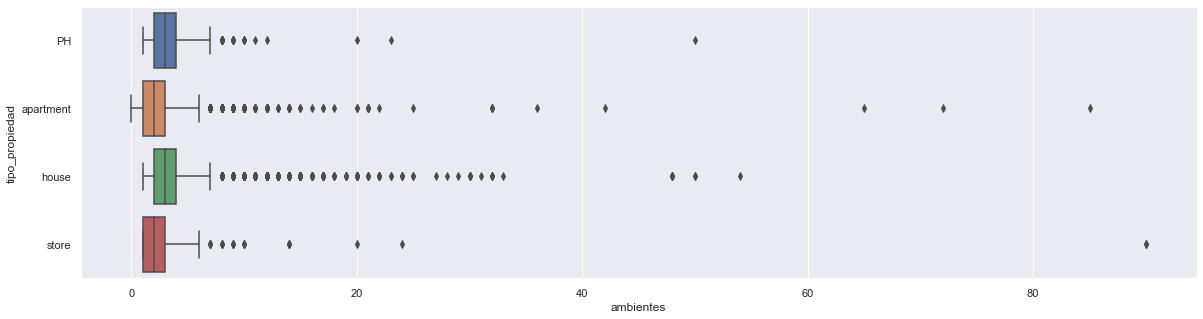

In [57]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['ambientes'],df['tipo_propiedad'])
plt.show()

### Investigamos los casos con más de 35 ambientes

In [58]:
pd.set_option('display.max_colwidth', -1)
df[df['ambientes'] >= 35][['tipo_propiedad','ambientes','descripcion', 'titulo']]

,tipo_propiedad,ambientes,descripcion,titulo
4808,house,48.0,"imponente y distinguida casa desarrollada en 2 plantas, con costa sobre lag1a!!!la propiedad ubicada en 1 de los barrios ma!s consolida2 y demanda2 de todo zona norte, cuenta con 1a construccia3n sa3lida y de excelente calidad, con 1 lote que se distingue por su orientacia3n y hermosas vistas.pb: puerta de acceso en vidrio, forjada en hierro. distinguido hall de recepcia3n, amplio, luminoso y elegante living con hogar a lea+-os. refinado comedor muy luminoso, con exquisitas vistas al jardan y lag1a. ca3modo toilette de recepcia3n con ducha. ca3modo lugar de guardado bajo/ placard de recepcia3n. delicada escalera revestida en ma!rmol con laboriosos trabajos de herreraa. escritorio o cuarto de hua(c)spedes, con vista al frente de la casa y pisos de incienso. interesante cocina muy bien equipada, gran comedor diario con acceso al jardan. ca3moda despensa. entrada de servicios lateral y al frente. cuarto de servicio al frente con baa+-o completo. amplia escalera de servicio, en planta alta a!rea de servicio con lavadero y tender/ exterior.pa: para acceder a esta plata se cuenta con doble acceso (escalera principal y de servicios). hall de distribucia3n con pisos de madera y mucho placard de guardado (ropa blanca y otros). muy luminoso y proporcionado play con vistas muy lindas al campo de golf de marinas golf. habitacia3n principal (pisosmoqueta) en suite con balca3n terraza, vistas estupenda a jardan y lag1a, vasto vestidor + placard completo. baa+-o completo con muebles de madera a medida. suite j1ior (pisos moqueta), con baa+-o y placard completos, con balca3n terraza, vistas estupenda a jardan y lag1a. suite j1ior (pisos madera) al frente, con baa+-o y placard completos, vistas muy lindas al campo de golf de marinas golf.jardan: hermosa y amplia galeraa, parrilla lateral. hermosa piscina recubierta en venecitas. baa+-o para piscina. excelente parquizacia3n con riego automa!tico. muelle de madera con escalera de acceso.al frente cochera cubierta para 2 autos. placar de guardado. entrada de servicio. area de ma!quinas. barrio na!utico santa maria de tigrenacia3 en el aa+-o 1995, siendo 1 de los pioneros al momento de marcar el crecimiento de la zona del nuevo tigre.el barrio, compuesto por 722 lotes, tiene 1a lag1a de 8 ha, salida directa al rao luja!n (lo que permite que el 30% de los lotes tengan com1icacia3n directa al agua), y 1a zona de media densidad con 48 dormies. tambia(c)n cuenta con 1 centro comercial, 1a capilla y 1 edificio de oficinas. su paisaje fue disea+-ado con 1 plan de forestacia3n de plantas adaptadas al tipo de suelo. incluyen variedades auta3ctonas y exa3ticas que, j1tas, forman 1a vista pintoresca, natural y muy verde.ubicacia3n se encuentra sobre la avenida santa maraa -ex ruta 27- a 5 km del centro de tigre y a 28 km de capital federal. se puede llegar desde el acceso tigre de panamericana, tomando el camino de los remeros. a metros de la entrada se encuentra el colegio santa teresa y a menos de 1 km esta! el centro comercial nordelta.","casa 929m2 con telefono, tigre, benavidez, por u$s 970.000"
8892,apartment,72.0,"arias 2371 se encuentra estrata(c)gicamente ubicado en p1ta chica, en 1a de las zonas ma!s residenciales, naturales y cercanas al rao.su ubicacia3n hace ideal a este desarrollo para to2 aquellos que se identifiquen con el agua, los espacios verdes, el silencio y los deportes acua!ticos.de fa!cil acceso y muy a!gil a la hora de trasladarse por su cercanaa a av. del libertador y por estar a 100 mts de la estacia3n marina nueva del tren de la costa. el proyecto- edificio de categoraa, de planta baja, 2 pisos y cocheras subterra!neas con bauleras (12 1idades f1cionales y 15 cocheras)- ubicacia3n estrata(c)gica - calidad de construccia3n - detalles de disea+-o - espacios amplios y luminosos - disea+-o moderno, a!gil y f1cional - departamentos con terraza, balca3n y parrillas propias - 3 departamentos con terrazas, jardines y parrillas

In [59]:
pd.reset_option('^display.')

In [60]:
# Reemplazamos las valores > 35, porque sacamos mala información de la descripcíon o el titulo
df['ambientes'] = np.where((df['ambientes'] >= 35),np.nan,df['ambientes'])

In [61]:
# Para un departamento es muy poco probable que tienen más de 10 ambientes.
# Estos valores también reemplezamos por np.nan.
df['ambientes'] = np.where((df['ambientes'] > 10)&(df['tipo_propiedad']=='apartment'),np.nan,df['ambientes'])

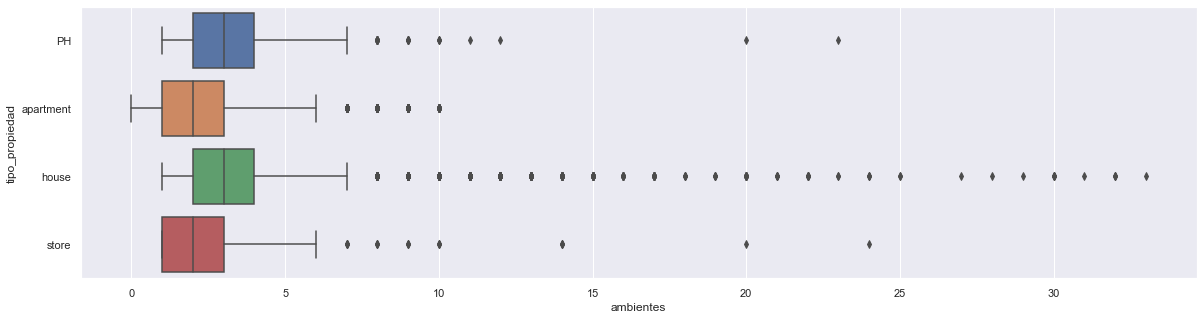

In [62]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['ambientes'],df['tipo_propiedad'])
plt.show()

#### Por ahora dejamos los otros outliers, porque no podemos decir con suficiente certeza si se trata de valores erroneos o si estas propiedades realmente tienen muchos ambientes.

## Análisis del los campos de Superficie

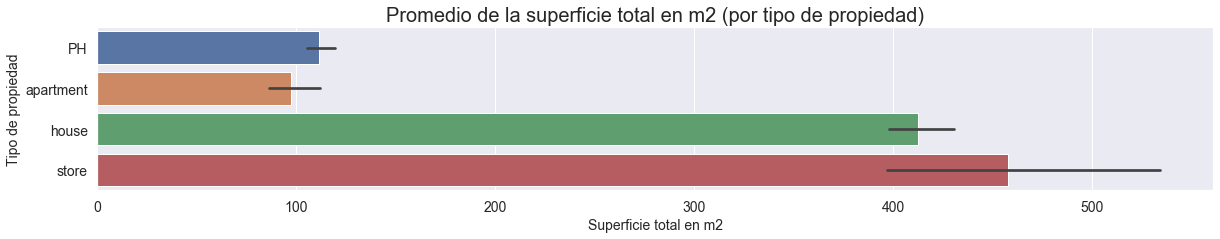

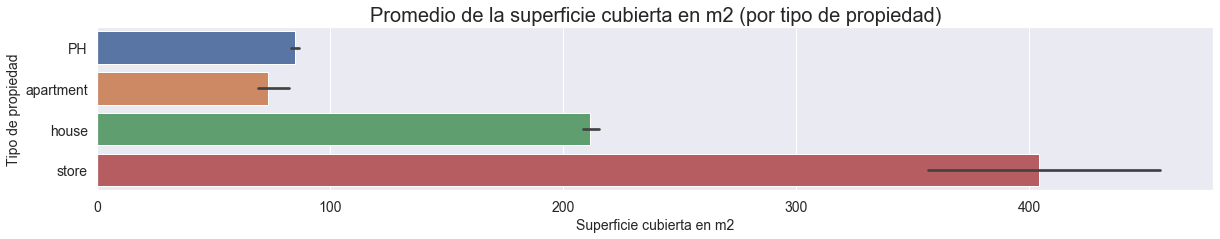

In [63]:
fig, ax = plt.subplots(figsize=(20,3))  
sns.barplot(x='superficie_total_m2', y='tipo_propiedad', data=df)
plt.title('Promedio de la superficie total en m2 (por tipo de propiedad)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Superficie total en m2', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(20,3))  
sns.barplot(x='superficie_cubierta_m2', y='tipo_propiedad', data=df)
plt.title('Promedio de la superficie cubierta en m2 (por tipo de propiedad)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Superficie cubierta en m2', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.show()

In [64]:
print('cantidad outliers dataset total:',cantidad_outliers(df, 'superficie_total_m2'))
print('cantidad outliers sub-dataset house:',cantidad_outliers(df_house, 'superficie_total_m2'))
print('cantidad outliers sub-dataset apartment:',cantidad_outliers(df_apartment, 'superficie_total_m2'))
print('cantidad outliers sub-dateset PH:',cantidad_outliers(df_PH, 'superficie_total_m2'))
print('cantidad outliers sub-dateset store:',cantidad_outliers(df_store, 'superficie_total_m2'))

cantidad outliers dataset total: 227
cantidad outliers sub-dataset house: 154
cantidad outliers sub-dataset apartment: 37
cantidad outliers sub-dateset PH: 6
cantidad outliers sub-dateset store: 25


In [65]:
print('cantidad outliers dataset total:',cantidad_outliers(df, 'superficie_cubierta_m2'))
print('cantidad outliers sub-dataset house:',cantidad_outliers(df_house, 'superficie_cubierta_m2'))
print('cantidad outliers sub-dataset apartment:',cantidad_outliers(df_apartment, 'superficie_cubierta_m2'))
print('cantidad outliers sub-dateset PH:',cantidad_outliers(df_PH, 'superficie_cubierta_m2'))
print('cantidad outliers sub-dateset store:',cantidad_outliers(df_store, 'superficie_cubierta_m2'))

cantidad outliers dataset total: 141
cantidad outliers sub-dataset house: 79
cantidad outliers sub-dataset apartment: 30
cantidad outliers sub-dateset PH: 57
cantidad outliers sub-dateset store: 33


### Aunque la cantidad de outliers no es muy grande, los valores son muy extremos

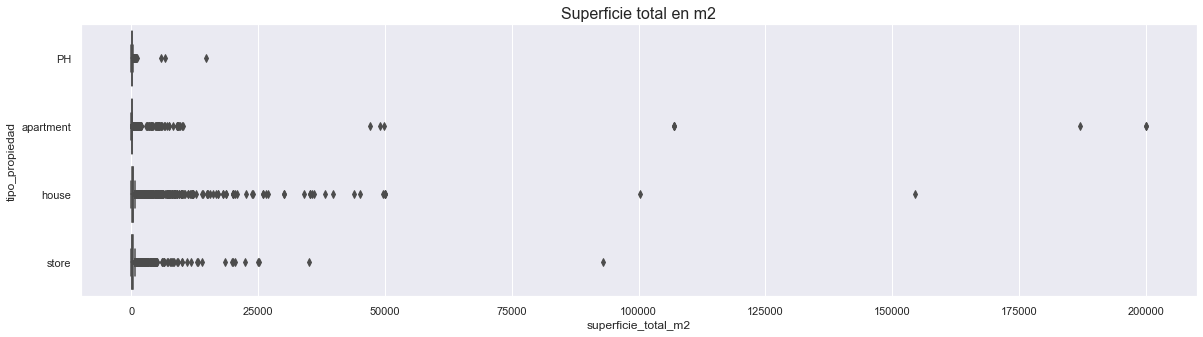

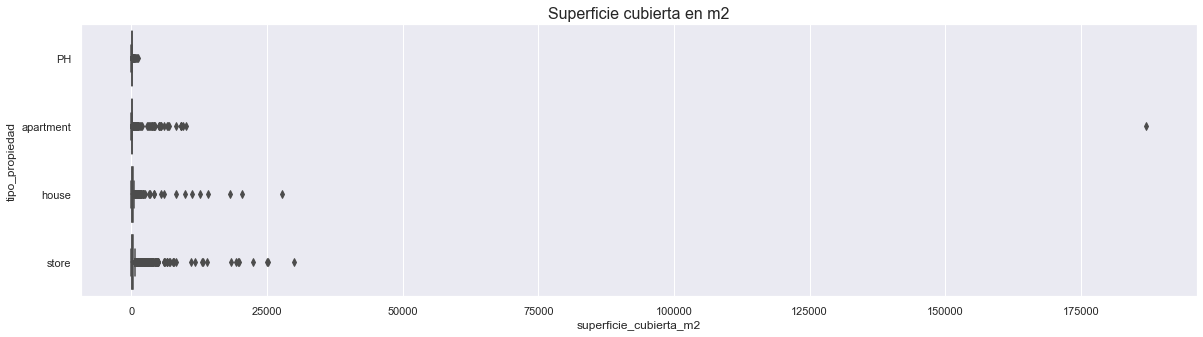

In [66]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['superficie_total_m2'], df['tipo_propiedad'])
plt.title('Superficie total en m2', fontsize=16)
plt.show()

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['superficie_cubierta_m2'],df['tipo_propiedad'])
plt.title('Superficie cubierta en m2', fontsize=16)
plt.show()

In [67]:
# Para un departamento o PH, si la superficie es más grande que 500 m2 seguramente es un valor incorrecto.
# Por ahora reemplazamos estos valores por np.nan. Al final vamos hacer una imputación sobre los NaN's.
df['superficie_total_m2'] = np.where((df['superficie_total_m2'] >= 500)&(df['tipo_propiedad']=='apartment'),np.nan,df['superficie_total_m2'])
df['superficie_cubierta_m2'] = np.where((df['superficie_cubierta_m2'] >= 500)&(df['tipo_propiedad']=='apartment'),np.nan,df['superficie_cubierta_m2'])
df['superficie_total_m2'] = np.where((df['superficie_total_m2'] >= 500)&(df['tipo_propiedad']=='PH'),np.nan,df['superficie_total_m2'])
df['superficie_cubierta_m2'] = np.where((df['superficie_cubierta_m2'] >= 500)&(df['tipo_propiedad']=='PH'),np.nan,df['superficie_cubierta_m2'])

In [68]:
#Investigamos los casos con un superficie total más grande que 10 mil m2
#df[(df['superficie_total_m2'] > 10000)][['tipo_propiedad','localidad','precio_USD','superficie_total_m2','superficie_cubierta_m2','ambientes','descripcion', 'titulo']]

In [69]:
# Hay algunos propiedades con un superficie total muy grande (casas con mucho terreno, lotes industriales). 
# Por el proposito de nuestro proyecto, decidimos eliminar las propiedades con un superficie total más grande que 10 mil m2,
# porque podrían afectar significativamente la tendencia del dataset.

df.drop(df[(df['superficie_total_m2'] > 10000)].index,inplace = True)

In [70]:
#Investigamos los casos con un superficie cubierta más grande que 5 mil m2
#df[(df['superficie_cubierta_m2'] > 5000)][['tipo_propiedad','localidad','precio_USD','superficie_total_m2','superficie_cubierta_m2','ambientes','descripcion', 'titulo']]

In [71]:
# Además decidimos elimnar las propiedades con un superficie cubierta más grande que 5 mil m2 (muchas propiedades industriales)

df.drop(df[(df['superficie_cubierta_m2'] > 5000)].index,inplace = True)

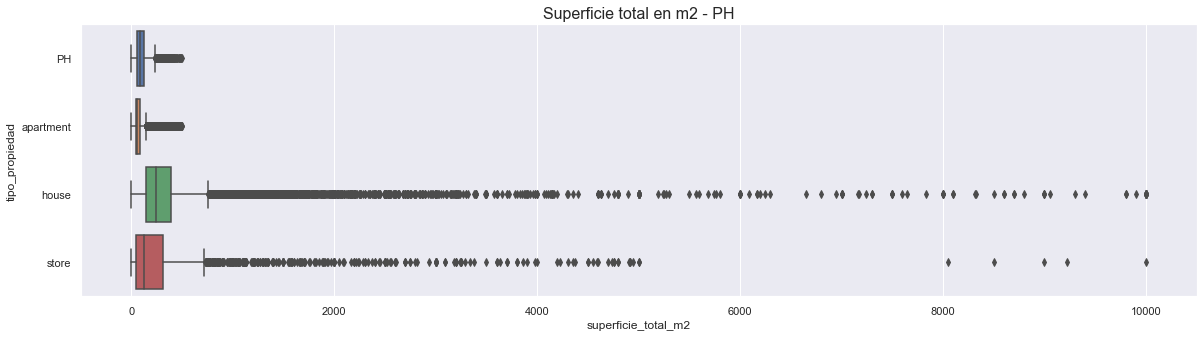

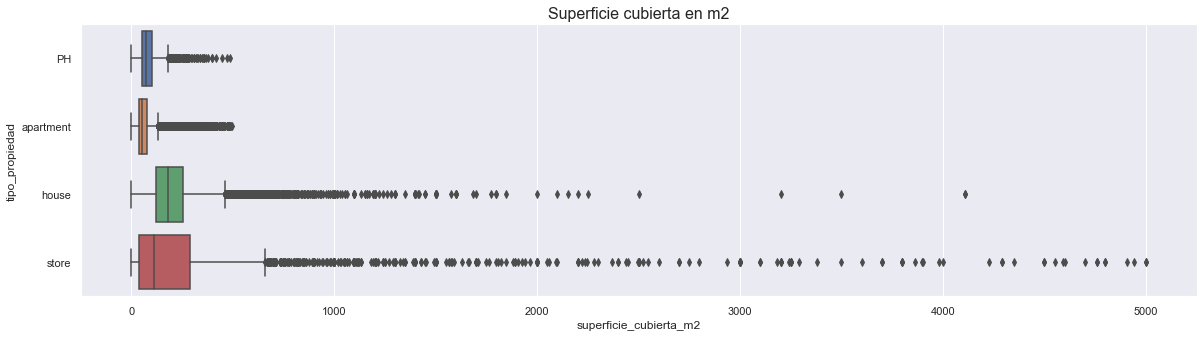

In [72]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['superficie_total_m2'], df['tipo_propiedad'])
plt.title('Superficie total en m2 - PH', fontsize=16)
plt.show()

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['superficie_cubierta_m2'],df['tipo_propiedad'])
plt.title('Superficie cubierta en m2', fontsize=16)
plt.show()

## Análisis del los campos de precio

### Por tipo de propiedad

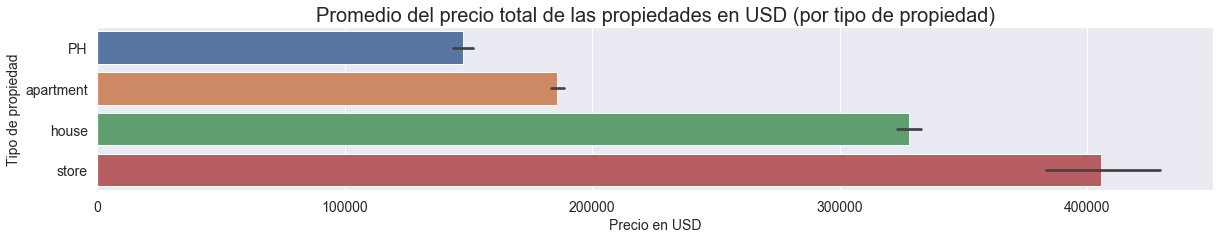

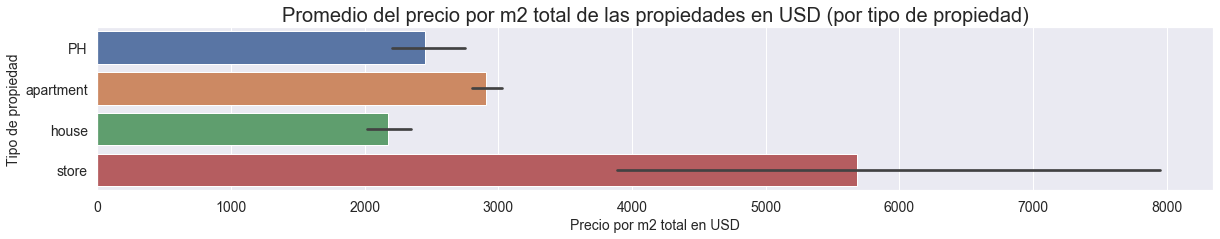

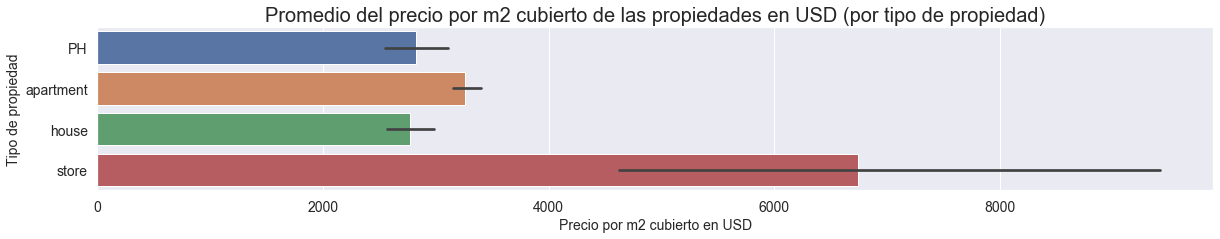

In [73]:
fig, ax = plt.subplots(figsize=(20,3))  
sns.barplot(x='precio_USD', y='tipo_propiedad', data=df)
plt.title('Promedio del precio total de las propiedades en USD (por tipo de propiedad)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Precio en USD', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(20,3))  
sns.barplot(x='precio_USD_por_m2_total', y='tipo_propiedad', data=df)
plt.title('Promedio del precio por m2 total de las propiedades en USD (por tipo de propiedad)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Precio por m2 total en USD', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(20,3))  
sns.barplot(x='precio_USD_por_m2_cubierto', y='tipo_propiedad', data=df)
plt.title('Promedio del precio por m2 cubierto de las propiedades en USD (por tipo de propiedad)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Precio por m2 cubierto en USD', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.show()

In [74]:
print('PRECIO TOTAL EN USD')
print('cantidad outliers dataset total:',cantidad_outliers(df, 'precio_USD'))
print('cantidad outliers sub-dataset house:',cantidad_outliers(df_house, 'precio_USD'))
print('cantidad outliers sub-dataset apartment:',cantidad_outliers(df_apartment, 'precio_USD'))
print('cantidad outliers sub-dateset PH:',cantidad_outliers(df_PH, 'precio_USD'))
print('cantidad outliers sub-dateset store:',cantidad_outliers(df_store, 'precio_USD'))

PRECIO TOTAL EN USD
cantidad outliers dataset total: 1208
cantidad outliers sub-dataset house: 371
cantidad outliers sub-dataset apartment: 670
cantidad outliers sub-dateset PH: 44
cantidad outliers sub-dateset store: 57


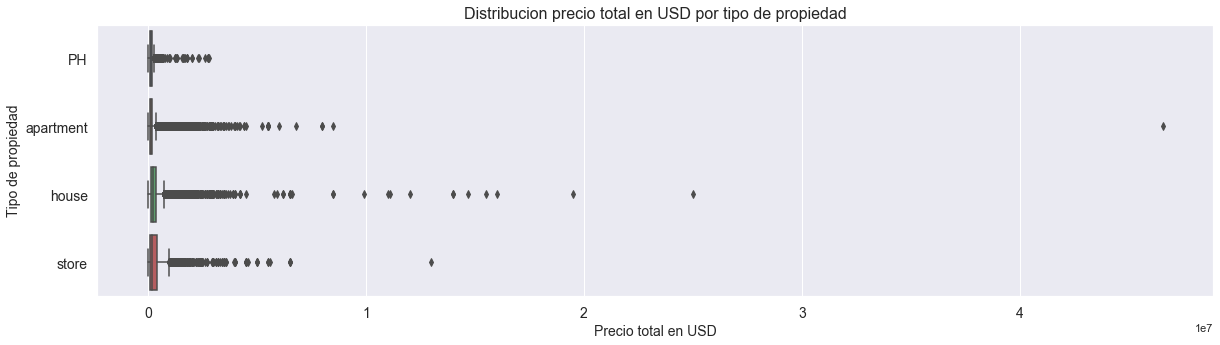

In [75]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['precio_USD'], df['tipo_propiedad'])
plt.xlabel('Precio total en USD', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribucion precio total en USD por tipo de propiedad', fontsize=16)
plt.show()

In [76]:
#Investigamos los casos con un precio USD más alto que 10 milliones.
#df[(df['precio_USD'] > 10000000)][['tipo_propiedad','localidad','precio_USD','precio_local','superficie_total_m2','superficie_cubierta_m2','ambientes','descripcion', 'titulo']]

In [77]:
# Por el proposito de nuestro proyecto, decidimos eliminar las propiedades con un precio más alto que USD 10 milliones,
# porque podrían afectar significativamente la tendencia del dataset.

df.drop(df[(df['precio_USD'] > 10000000)].index,inplace = True)

In [78]:
print('PRECIO POR M2 TOTAL EN USD')
print('cantidad outliers dataset total:',cantidad_outliers(df, 'precio_USD_por_m2_total'))
print('cantidad outliers sub-dataset house:',cantidad_outliers(df_house, 'precio_USD_por_m2_total'))
print('cantidad outliers sub-dataset apartment:',cantidad_outliers(df_apartment, 'precio_USD_por_m2_total'))
print('cantidad outliers sub-dateset PH:',cantidad_outliers(df_PH, 'precio_USD_por_m2_total'))
print('cantidad outliers sub-dateset store:',cantidad_outliers(df_store, 'precio_USD_por_m2_total'))
print('')
print('PRECIO POR M2 CUBIERTO EN USD')
print('cantidad outliers dataset total:',cantidad_outliers(df, 'precio_USD_por_m2_cubierto'))
print('cantidad outliers sub-dataset house:',cantidad_outliers(df_house, 'precio_USD_por_m2_cubierto'))
print('cantidad outliers sub-dataset apartment:',cantidad_outliers(df_apartment, 'precio_USD_por_m2_cubierto'))
print('cantidad outliers sub-dateset PH:',cantidad_outliers(df_PH, 'precio_USD_por_m2_cubierto'))
print('cantidad outliers sub-dateset store:',cantidad_outliers(df_store, 'precio_USD_por_m2_cubierto'))

PRECIO POR M2 TOTAL EN USD
cantidad outliers dataset total: 220
cantidad outliers sub-dataset house: 87
cantidad outliers sub-dataset apartment: 99
cantidad outliers sub-dateset PH: 28
cantidad outliers sub-dateset store: 10

PRECIO POR M2 CUBIERTO EN USD
cantidad outliers dataset total: 266
cantidad outliers sub-dataset house: 108
cantidad outliers sub-dataset apartment: 131
cantidad outliers sub-dateset PH: 32
cantidad outliers sub-dateset store: 11


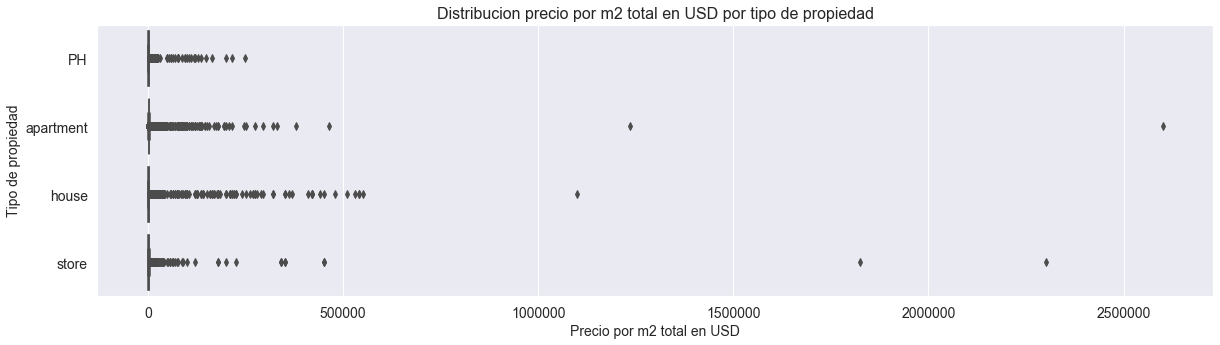

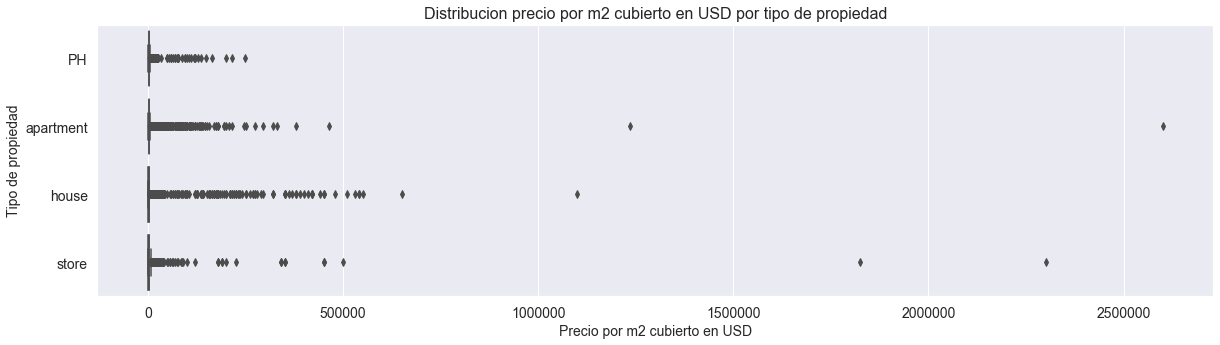

In [79]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['precio_USD_por_m2_total'], df['tipo_propiedad'])
plt.xlabel('Precio por m2 total en USD', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribucion precio por m2 total en USD por tipo de propiedad', fontsize=16)
plt.show()

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['precio_USD_por_m2_cubierto'], df['tipo_propiedad'])
plt.xlabel('Precio por m2 cubierto en USD', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribucion precio por m2 cubierto en USD por tipo de propiedad', fontsize=16)
plt.show()

In [80]:
# Precios por m2 más altos que 15.000 dolares son tan  improbables que suponemos que estos valores son incorrectos. 
# Por ahora reemplazamos estos valores por np.nan. Al final vamos hacer una imputación sobre los NaN's.

df['precio_USD_por_m2_total'] = np.where((df['precio_USD_por_m2_total'] > 15000),np.nan,df['precio_USD_por_m2_total'])
df['precio_USD_por_m2_cubierto'] = np.where((df['precio_USD_por_m2_cubierto'] > 15000),np.nan,df['precio_USD_por_m2_cubierto'])

# Los precios por m2 son basados en los precios totales, entonces para estos casos también reemplamos precio_USD por np.nan
df['precio_USD'] = np.where((df['precio_USD_por_m2_total'] > 15000),np.nan,df['precio_USD'])
df['precio_USD'] = np.where((df['precio_USD_por_m2_cubierto'] > 15000),np.nan,df['precio_USD'])

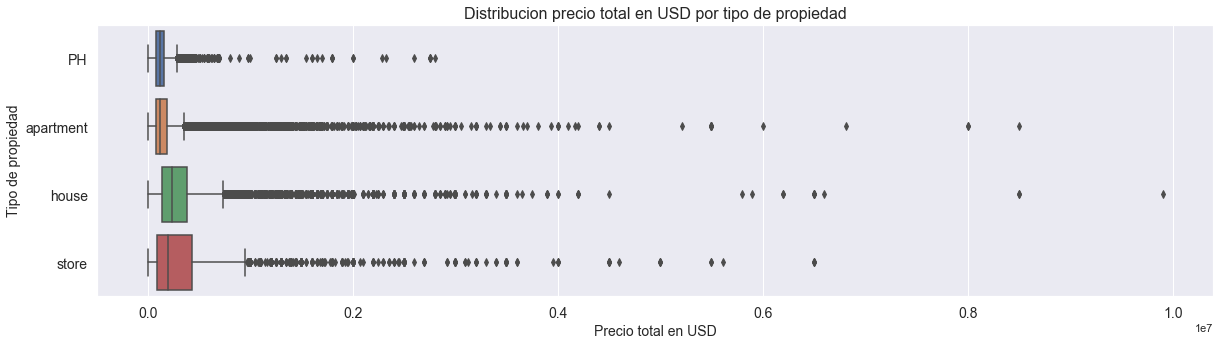

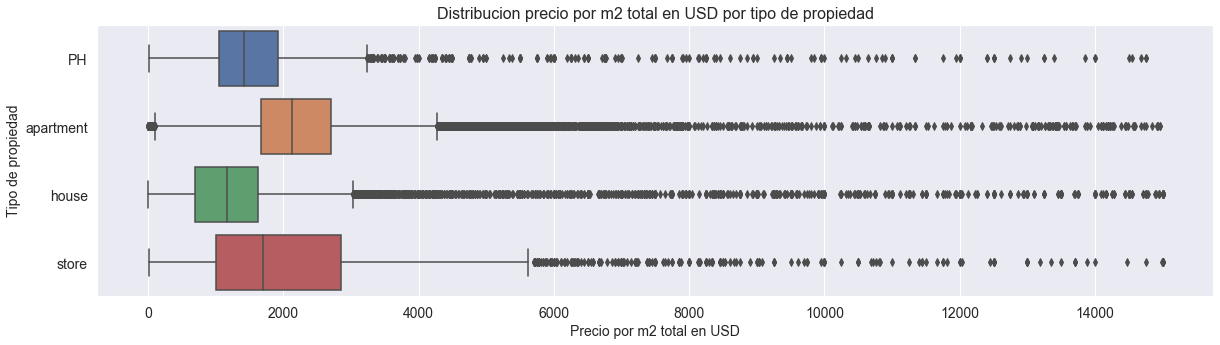

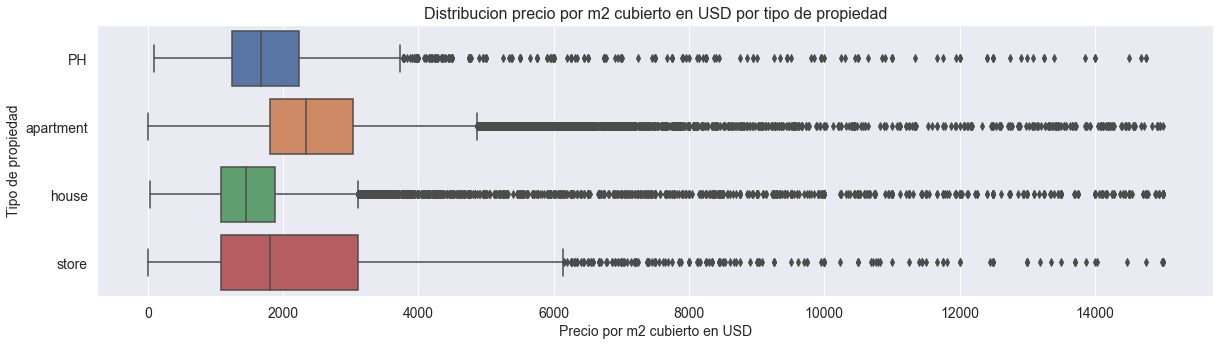

In [81]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['precio_USD'], df['tipo_propiedad'])
plt.xlabel('Precio total en USD', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribucion precio total en USD por tipo de propiedad', fontsize=16)
plt.show()

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['precio_USD_por_m2_total'], df['tipo_propiedad'])
plt.xlabel('Precio por m2 total en USD', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribucion precio por m2 total en USD por tipo de propiedad', fontsize=16)
plt.show()

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['precio_USD_por_m2_cubierto'], df['tipo_propiedad'])
plt.xlabel('Precio por m2 cubierto en USD', fontsize=14)
plt.ylabel('Tipo de propiedad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribucion precio por m2 cubierto en USD por tipo de propiedad', fontsize=16)
plt.show()

### Por localidad

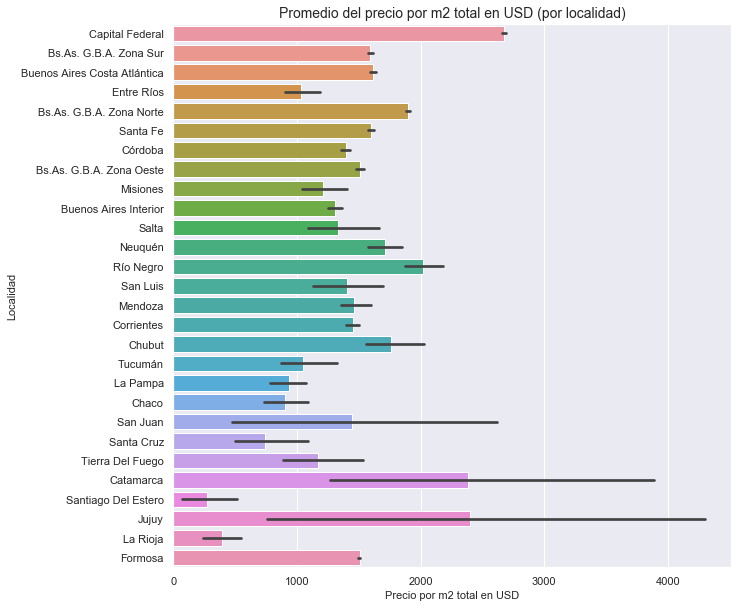

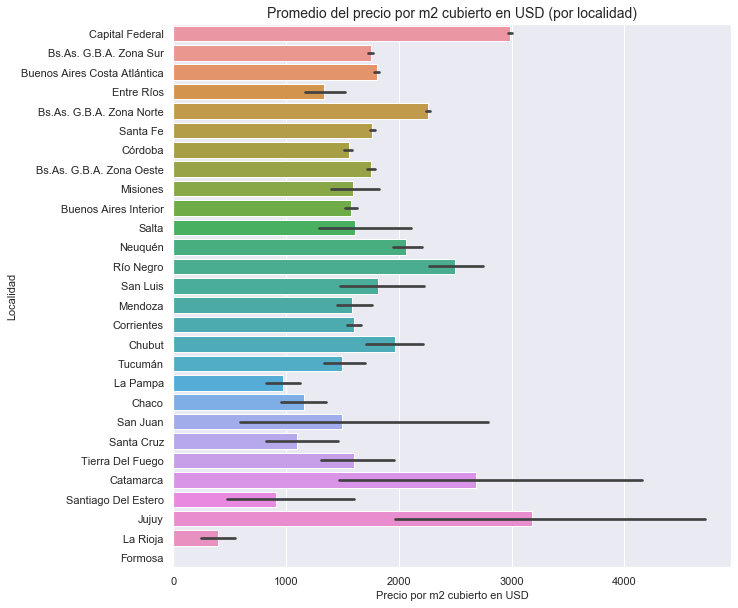

In [82]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.barplot(x='precio_USD_por_m2_total', y='localidad', data=df)
plt.title('Promedio del precio por m2 total en USD (por localidad)', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Precio por m2 total en USD', fontsize=11)
plt.ylabel('Localidad',fontsize=11)
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='precio_USD_por_m2_cubierto', y='localidad', data=df)
plt.title('Promedio del precio por m2 cubierto en USD (por localidad)',fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Precio por m2 cubierto en USD', fontsize=11)
plt.ylabel('Localidad',fontsize=11)
plt.show()

### Observamos varias localidades con precios por m2 más alto que esperabamos (por ejemplo Jujuy y Catamarca). Algunas localidades tienen un error estandar muy alto. Parece que estos datos no son muy confiables. Probablemente porque hay pocos registros en algunas localidades. Sería mejor enforcarnos en las localidades con más datos.

In [83]:
df['localidad'].value_counts()

Capital Federal                 30363
Bs.As. G.B.A. Zona Norte        24511
Bs.As. G.B.A. Zona Sur          13515
Córdoba                         11413
Buenos Aires Costa Atlántica     9462
Bs.As. G.B.A. Zona Oeste         9024
Santa Fe                         8938
Buenos Aires Interior            2192
Río Negro                         764
Mendoza                           643
Tucumán                           633
Corrientes                        574
Neuquén                           572
Misiones                          401
Entre Ríos                        351
Salta                             275
Chubut                            259
San Luis                          241
La Pampa                          152
Chaco                              57
San Juan                           40
Formosa                            32
Tierra Del Fuego                   31
Jujuy                              26
Santa Cruz                         20
Catamarca                          19
La Rioja    

In [84]:
df_CABA = df.loc[df['localidad'] == 'Capital Federal']

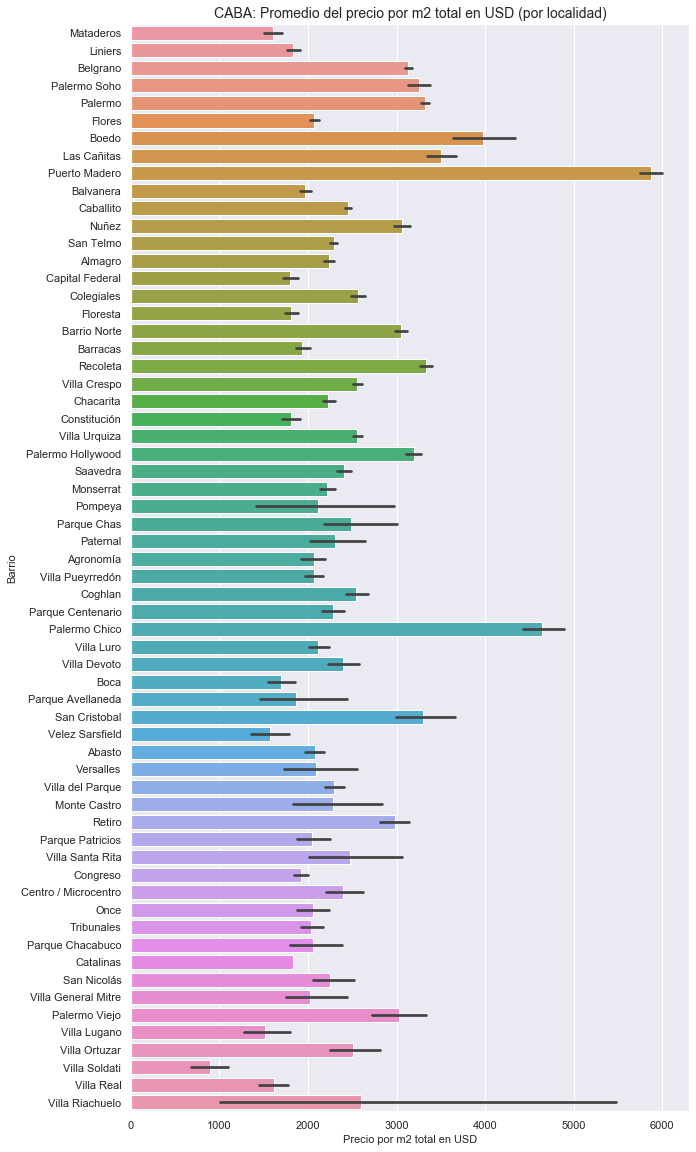

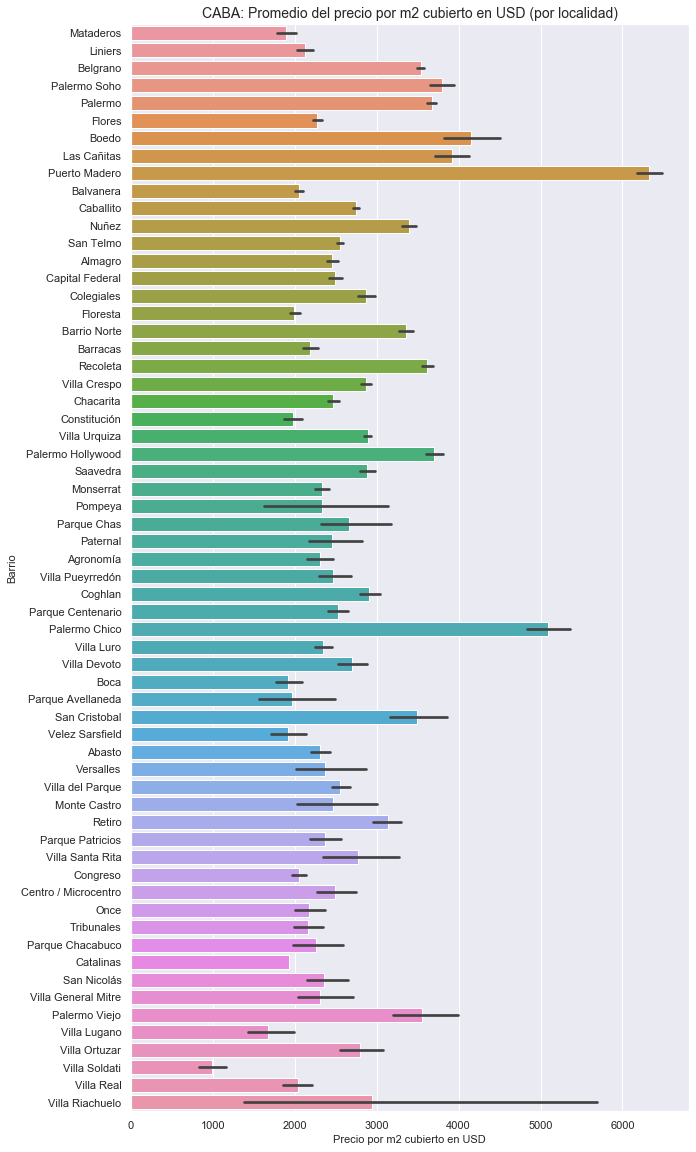

In [85]:
fig, ax = plt.subplots(figsize=(10,20))  
sns.barplot(x='precio_USD_por_m2_total', y='barrio', data=df_CABA)
plt.title('CABA: Promedio del precio por m2 total en USD (por localidad)', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Precio por m2 total en USD', fontsize=11)
plt.ylabel('Barrio',fontsize=11)
plt.show()

fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x='precio_USD_por_m2_cubierto', y='barrio', data=df_CABA)
plt.title('CABA: Promedio del precio por m2 cubierto en USD (por localidad)',fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Precio por m2 cubierto en USD', fontsize=11)
plt.ylabel('Barrio',fontsize=11)
plt.show()

### Observamos algunos barrios con un promedio del precio por m2 más alto que esperabamos: Boedo, San Cristobal y Villa Riachuelo

### Calculo los precios promedio por M2 por Barrio

In [86]:
Precio_total=df[(df['precio_USD_por_m2_total'] < 10000)]
PrecioProm_total=pd.DataFrame(Precio_total.groupby(['barrio', 'tipo_propiedad'])['precio_USD_por_m2_total'].mean())
PrecioProm_total.rename(columns={'precio_USD_por_m2_total': 'PromPrecio_total'},inplace=True)
df = pd.merge(left=df,right=PrecioProm_total, how='left',left_on=['barrio','tipo_propiedad'], right_on = ['barrio','tipo_propiedad'])

Precio_cubierto=df[(df['precio_USD_por_m2_cubierto'] < 15000)]
PrecioProm_cubierto=pd.DataFrame(Precio_cubierto.groupby(['barrio', 'tipo_propiedad'])['precio_USD_por_m2_cubierto'].mean())
PrecioProm_cubierto.rename(columns={'precio_USD_por_m2_cubierto': 'PromPrecio_cubierto'},inplace=True)
df = pd.merge(left=df,right=PrecioProm_cubierto, how='left',left_on=['barrio','tipo_propiedad'], right_on = ['barrio','tipo_propiedad'])

### Ajusto Boedo, San Cristobal y Villa Riachuelo

In [87]:
print(df.loc[(df['barrio'] =='Boedo'),'precio_USD_por_m2_total'].mean())
print(df.loc[(df['barrio'] =='Boedo'),'precio_USD_por_m2_cubierto'].mean())
print(df.loc[(df['barrio'] =='San Cristobal'),'precio_USD_por_m2_total'].mean())
print(df.loc[(df['barrio'] =='San Cristobal'),'precio_USD_por_m2_cubierto'].mean())
print(df.loc[(df['barrio'] =='Villa Riachuelo'),'precio_USD_por_m2_total'].mean())
print(df.loc[(df['barrio'] =='Villa Riachuelo'),'precio_USD_por_m2_cubierto'].mean())

3980.2656948614404
4156.63730000575
3301.5419784783767
3493.798321333387
2599.7477931904164
2938.233397807866


In [88]:
conditions = [(df['barrio'] =='Boedo') & (df['precio_USD_por_m2_total'] > df['PromPrecio_total']), 
              (df['barrio'] =='San Cristobal') & (df['precio_USD_por_m2_total'] > df['PromPrecio_total']),
              (df['barrio'] =='Villa Riachuelo') & (df['precio_USD_por_m2_total'] > df['PromPrecio_total'])]
choices = [(df['PromPrecio_total']*df['superficie_total_m2']) ,(df['PromPrecio_total']*df['superficie_total_m2']), (df['PromPrecio_total']*df['superficie_total_m2'])]
df['precio_USD'] = np.select(conditions, choices, df['precio_USD'])
choices = [(df['PromPrecio_total']), (df['PromPrecio_total']),(df['PromPrecio_total'])]
df['precio_USD_por_m2_total'] = np.select(conditions, choices, df['precio_USD_por_m2_total'])
choices = [(df['PromPrecio_cubierto']),(df['PromPrecio_cubierto']),(df['PromPrecio_cubierto'])]
df['precio_USD_por_m2_cubierto'] = np.select(conditions, choices, df['precio_USD_por_m2_cubierto'])

In [89]:
print(df.loc[(df['barrio'] =='Boedo'),'precio_USD_por_m2_total'].mean())
print(df.loc[(df['barrio'] =='Boedo'),'precio_USD_por_m2_cubierto'].mean())
print(df.loc[(df['barrio'] =='San Cristobal'),'precio_USD_por_m2_total'].mean())
print(df.loc[(df['barrio'] =='San Cristobal'),'precio_USD_por_m2_cubierto'].mean())
print(df.loc[(df['barrio'] =='Villa Riachuelo'),'precio_USD_por_m2_total'].mean())
print(df.loc[(df['barrio'] =='Villa Riachuelo'),'precio_USD_por_m2_cubierto'].mean())

1994.453687627465
2684.7802783965026
1893.508649433412
2416.195321224471
1841.2883564522908
2349.0167633784654


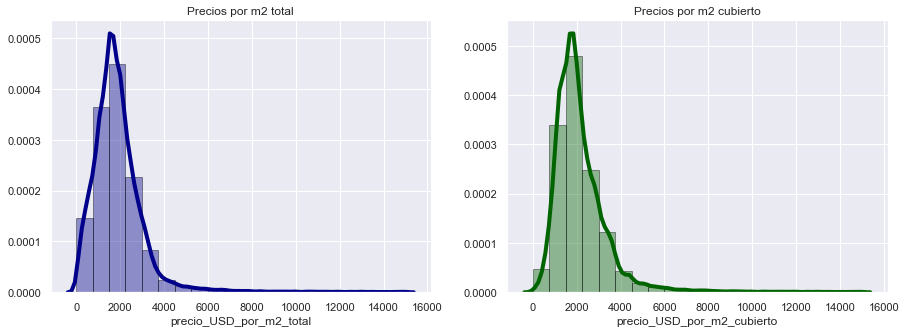

In [120]:
#HISTOGRAMA PRECIOS POR M2
plt.figure(figsize=(15,5))
           
plt.subplot(121)
Prenonull=df.dropna(subset=['precio_USD_por_m2_total'])
plt.title ('Precios por m2 total')
sns.distplot(Prenonull['precio_USD_por_m2_total'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot(122)
Prenonull=df.dropna(subset=['precio_USD_por_m2_cubierto'])
plt.title ('Precios por m2 cubierto')
sns.distplot(Prenonull['precio_USD_por_m2_cubierto'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

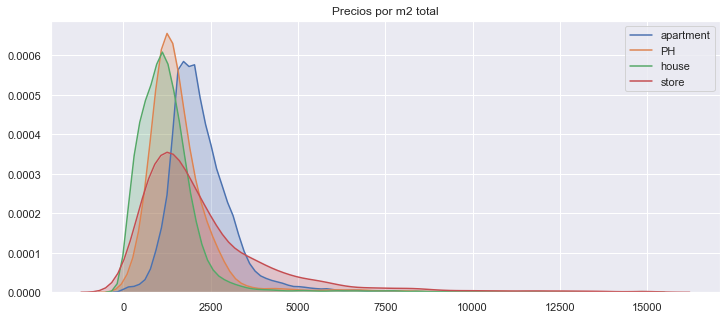

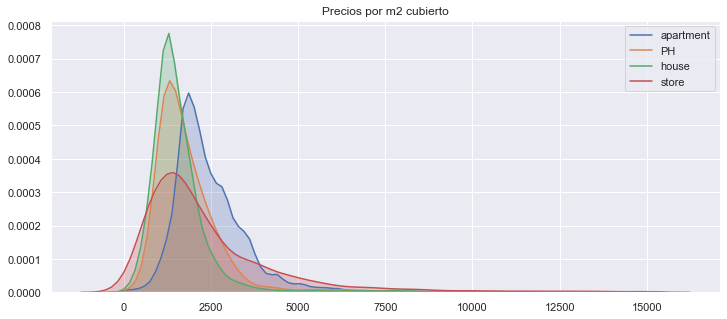

In [123]:
plt.figure(figsize=(12,5))
plt.title ('Precios por m2 total')
sns.kdeplot(df['precio_USD_por_m2_total'].loc[(df['tipo_propiedad']=='apartment')], shade=True)
sns.kdeplot(df['precio_USD_por_m2_total'].loc[(df['tipo_propiedad']=='PH')], shade=True)
sns.kdeplot(df['precio_USD_por_m2_total'].loc[(df['tipo_propiedad']=='house')], shade=True)
sns.kdeplot(df['precio_USD_por_m2_total'].loc[(df['tipo_propiedad']=='store')], shade=True)
plt.legend(['apartment','PH','house','store'])
plt.show()

plt.figure(figsize=(12,5))
plt.title ('Precios por m2 cubierto')
sns.kdeplot(df['precio_USD_por_m2_cubierto'].loc[(df['tipo_propiedad']=='apartment')], shade=True)
sns.kdeplot(df['precio_USD_por_m2_cubierto'].loc[(df['tipo_propiedad']=='PH')], shade=True)
sns.kdeplot(df['precio_USD_por_m2_cubierto'].loc[(df['tipo_propiedad']=='house')], shade=True)
sns.kdeplot(df['precio_USD_por_m2_cubierto'].loc[(df['tipo_propiedad']=='store')], shade=True)
plt.legend(['apartment','PH','house','store'])
plt.show()

## Imputación de datos faltantes

### Primero borramos todas las filas con muchos valores nulos en todas las distintas columnas de precio (total y por m2) y superficie, porque estas filas no agregan valor a nuestro dataset

In [91]:
# Borramos todas las filas que tienen menos de 2 registros en las columnas precio_USD, precio_USD_por_m2_cubierto,
# precio_USD_por_m2_total, superficie_total_m2, superficie_cubierta_m2 y ambientes

df.dropna(axis=0, thresh=2, subset=['precio_USD','precio_USD_por_m2_cubierto','precio_USD_por_m2_total','superficie_total_m2','superficie_cubierta_m2','ambientes'], inplace=True)

In [92]:
faltantes = df.isnull().sum()
faltantes_porc = round((faltantes/len(df)),3)*100

faltantes_df = pd.concat([faltantes, faltantes_porc], axis=1)
faltantes_df.columns = ['Cantidad de datos faltantes', 'Porcentaje de datos faltantes']
faltantes_df

,Cantidad de datos faltantes,Porcentaje de datos faltantes
tipo_propiedad,0,0.0
barrio,0,0.0
lugar_con_padres,0,0.0
pais,0,0.0
localidad,0,0.0
geonames_id,17423,16.2
lat-lon,45003,41.7
latitud,45003,41.7
longitud,45003,41.7
precio,12161,11.3


### Ahora vamos a imputar el resto de los valores faltantes

### Ambientes
#### Imputamos los valores faltantes de la columna ambientes con un promedio basado en barrio y tipo de propiedad.

In [93]:
AmbientesProm=pd.DataFrame(df.groupby(['barrio', 'tipo_propiedad'])['ambientes'].mean().round())
AmbientesProm.rename(columns={'ambientes': 'PromAmbientes'},inplace=True)
df = pd.merge(left=df,right=AmbientesProm, how='left',left_on=['barrio','tipo_propiedad'], right_on = ['barrio','tipo_propiedad'])
df['ambientes'].fillna(df['PromAmbientes'], inplace=True)

### Superficies
#### Imputamos los valores faltantes de las columnas de superficie con un promedio basado en barrio, tipo de propiedad y cantidad de ambientes.

In [94]:
# Los superficies

SuperficieTotalProm=pd.DataFrame(df.groupby(['barrio','tipo_propiedad','ambientes'])['superficie_total_m2'].mean())
SuperficieTotalProm.rename(columns={'superficie_total_m2': 'PromSuperficieTotalm2'},inplace=True)
df = pd.merge(left=df,right=SuperficieTotalProm, how='left',left_on=['barrio','tipo_propiedad','ambientes'], right_on = ['barrio','tipo_propiedad','ambientes'])
df['superficie_total_m2'].fillna(df['PromSuperficieTotalm2'], inplace=True)

SuperficieCubiertaProm=pd.DataFrame(df.groupby(['barrio','tipo_propiedad','ambientes'])['superficie_cubierta_m2'].mean())
SuperficieCubiertaProm.rename(columns={'superficie_cubierta_m2': 'PromSuperficieCubiertam2'},inplace=True)
df = pd.merge(left=df,right=SuperficieCubiertaProm, how='left',left_on=['barrio','tipo_propiedad','ambientes'], right_on = ['barrio','tipo_propiedad','ambientes'])
df['superficie_cubierta_m2'].fillna(df['PromSuperficieCubiertam2'], inplace=True)


### Precios
#### Imputamos los valores faltantes en las columnas de precio con un promedio basado en barrio, tipo de propiedad y rango de superficie.

In [95]:
df['SuperficieTotalQuartiles'] = pd.qcut(df['superficie_total_m2'],4)
df['SuperficieCubiertaQuartiles'] = pd.qcut(df['superficie_cubierta_m2'],4)

In [96]:
# Los precios

PrecioM2TotalProm=pd.DataFrame(df.groupby(['barrio','tipo_propiedad','SuperficieTotalQuartiles'])['precio_USD_por_m2_total'].mean())
PrecioM2TotalProm.rename(columns={'precio_USD_por_m2_total': 'PromPrecio_USD_M2_Total'},inplace=True)
df = pd.merge(left=df,right=PrecioM2TotalProm, how='left',left_on=['barrio','tipo_propiedad','SuperficieTotalQuartiles'], right_on = ['barrio','tipo_propiedad','SuperficieTotalQuartiles'])
df['precio_USD_por_m2_total'].fillna(df['PromPrecio_USD_M2_Total'], inplace=True)

PrecioM2CubiertoProm=pd.DataFrame(df.groupby(['barrio','tipo_propiedad','SuperficieCubiertaQuartiles'])['precio_USD_por_m2_cubierto'].mean())
PrecioM2CubiertoProm.rename(columns={'precio_USD_por_m2_cubierto': 'PromPrecio_USD_M2_Cubierto'},inplace=True)
df = pd.merge(left=df,right=PrecioM2CubiertoProm, how='left',left_on=['barrio','tipo_propiedad','SuperficieCubiertaQuartiles'], right_on = ['barrio','tipo_propiedad','SuperficieCubiertaQuartiles'])
df['precio_USD_por_m2_cubierto'].fillna(df['PromPrecio_USD_M2_Cubierto'], inplace=True)

PrecioUSDCalc = df['precio_USD_por_m2_total']*df['superficie_total_m2']
df['precio_USD'].fillna(PrecioUSDCalc, inplace=True)

## Eliminamos las columnas temporarias que no necesitamos más

In [97]:
df.drop(["amb_descr", "amb_titulo","cuartos_titulo","cuartos_descr","cuartosmasuno_titulo","cuartosmasuno_descr",
         "hotel_titulo","hotel_descripcion","verifPrecioUSD","PromPrecio_total","PromPrecio_cubierto","PromAmbientes",
         "PromSuperficieTotalm2","PromSuperficieCubiertam2","SuperficieTotalQuartiles","SuperficieCubiertaQuartiles",
         "PromPrecio_USD_M2_Total","PromPrecio_USD_M2_Cubierto"],axis=1, inplace=True)

## Valores faltantes después limpieza

In [98]:
faltantes = df.isnull().sum()
faltantes_porc = round((faltantes/len(df)),3)*100

faltantes_df = pd.concat([faltantes, faltantes_porc], axis=1)
faltantes_df.columns = ['Cantidad de datos faltantes', 'Porcentaje de datos faltantes']
faltantes_df

,Cantidad de datos faltantes,Porcentaje de datos faltantes
tipo_propiedad,0,0.0
barrio,0,0.0
lugar_con_padres,0,0.0
pais,0,0.0
localidad,0,0.0
geonames_id,17423,16.2
lat-lon,45003,41.7
latitud,45003,41.7
longitud,45003,41.7
precio,12161,11.3


## Agregar columnas con presencia amenities

In [99]:
cualidades = {'al_frente':'al frente','excelente':['excelente', 'categoría', 'categoria', 'impecable', 'nuevo'],'lavadero': 'lavadero',
             'telefono': ['teléfono','telefono'], 'internet': 'internet', 'aire': 'aire',
             'calefaccion': ['calefacción','calefaccion','estufa', 'losa radiante'],
             'luminoso': ['luz', 'luminoso', 'luminosidad'], 'apto': 'apto', 'garage':['garage', 'cochera', 'estacionamiento'],
             'balcon': ['balcón','balcon'], 'terraza': 'terraza'}
amenities = {'parrilla':['parrilla','asador','quincho'], 'gimnasio': ['gimnasio','gym'], 'sum': 'sum', 'pileta': ['pileta', 'piscina'],
           'hidromasaje': ['hidromasaje','jacuzzi', 'ducha escocesa'], 'vigilancia' : ['vigilancia', 'seguridad'],
            'playrooom': 'playroom', 'cancha': ['cancha', 'tenis', 'futbol'] }
def create_dummies(dic, tp, col):
   for key, value in dic.items():
       if type(value) == list:
           words = ''
           for x in value:
               words += str(x) + '|'
           words = words[:-1]
           pattern = r'(' + str(words) +')'
       else:
           pattern = r'(' + str(value) +')'
       
       regex = re.compile(pattern, flags= re.IGNORECASE)
       exec('df["'+tp+'_'+key+'"] = df["'+col+'"].str.extract(regex, expand = True)')
       exec('df["'+tp+'_'+key+'"] = df["'+tp+'_'+key+'"].where(df["'+tp+'_'+key+'"].isnull(), 1).fillna(0).astype(int)')

create_dummies(amenities,'a', 'descripcion')
create_dummies(cualidades,'c', 'descripcion')

### Visualizamos algunas cualidades/amenities para una mejor idea de la oferta

In [100]:
df2 = df.pivot_table(['c_garage','a_pileta','a_parrilla','c_lavadero'],index='localidad', aggfunc={'c_garage': sum,'a_pileta':sum,'a_parrilla':sum,'c_lavadero':sum})
df3 = df.pivot_table(['c_garage','a_pileta','a_parrilla','c_lavadero'],index='localidad', aggfunc={'c_garage': len,'a_pileta':len,'a_parrilla':len,'c_lavadero':len})
df5 = round(df2 / df3,2)*100

In [101]:
df5

,a_parrilla,a_pileta,c_garage,c_lavadero
localidad,,,,
Bs.As. G.B.A. Zona Norte,57.0,48.0,50.0,47.0
Bs.As. G.B.A. Zona Oeste,34.0,21.0,43.0,37.0
Bs.As. G.B.A. Zona Sur,38.0,24.0,50.0,42.0
Buenos Aires Costa Atlántica,33.0,11.0,39.0,28.0
Buenos Aires Interior,31.0,22.0,38.0,34.0
Capital Federal,29.0,23.0,36.0,27.0
Catamarca,11.0,22.0,28.0,11.0
Chaco,28.0,16.0,37.0,37.0
Chubut,24.0,5.0,14.0,23.0


In [102]:
#Reseteo indices de dataframe temporales para poder trabjar con ellos en los graficos
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)
df5.reset_index(inplace=True)

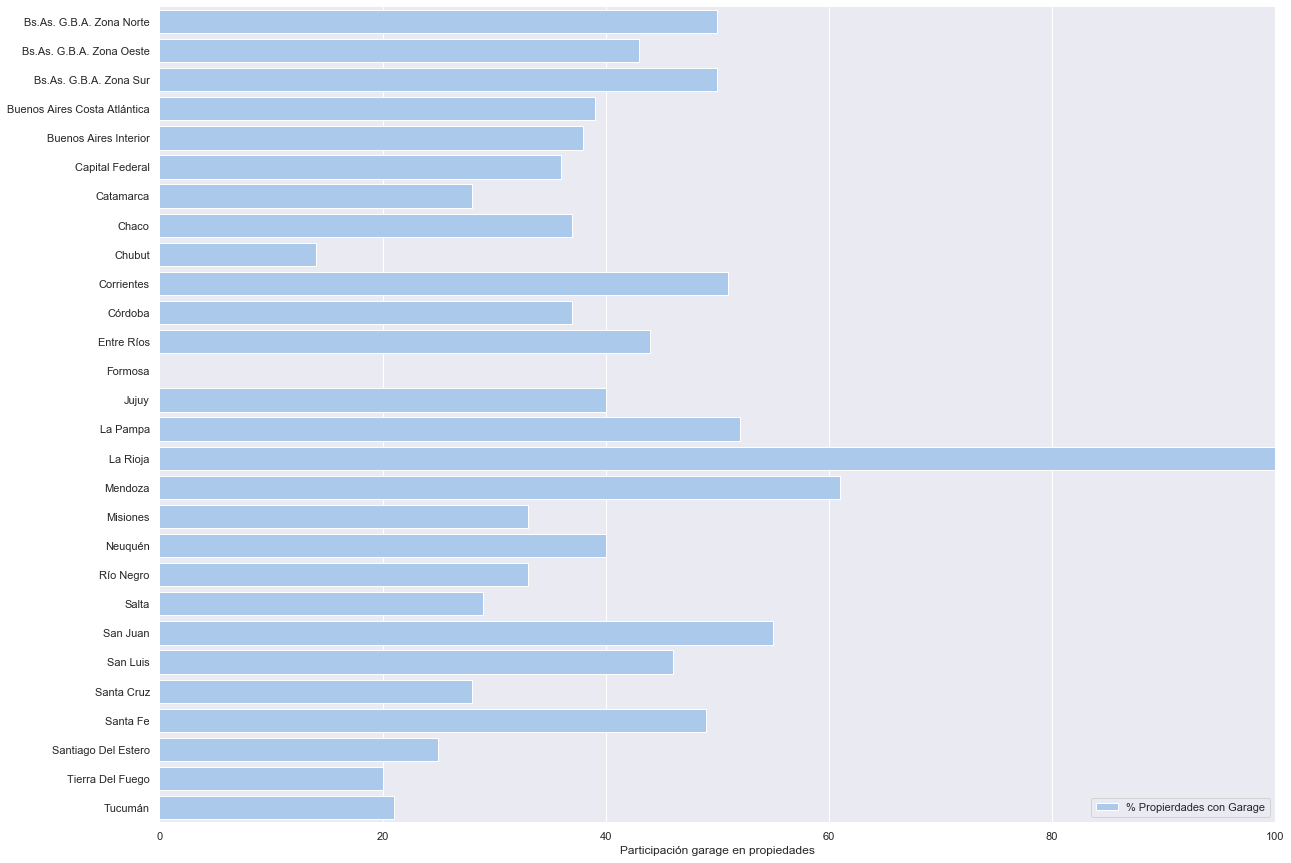

In [103]:
##Graficamos por ejemplo el % de propiedades c/garage por localidad
f, ax = plt.subplots(figsize=(20, 15))
sns.set_color_codes("pastel")
sns.barplot(x="c_garage", y="localidad", data=df5,
            label="% Propierdades con Garage", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Participación garage en propiedades")
sns.despine(left=True, bottom=True)